In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wf
%matplotlib inline

## 一. 处理音频

In [2]:
sample_rate, sigs = wf.read('./datas/temp.wav')
times = abs(np.arange(sigs.size / 2) / sample_rate)
print(f'Sample:{sample_rate}')
print(f'Signal Size:{sigs.size}')
print(f'Times: {times}')

Sample:48000
Signal Size:657408
Times: [0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 6.84793750e+00
 6.84795833e+00 6.84797917e+00]


In [3]:
single_channel = sigs[:, 0]
print(single_channel.shape)
length = single_channel.shape[0]
x = np.arange(length)

(328704,)


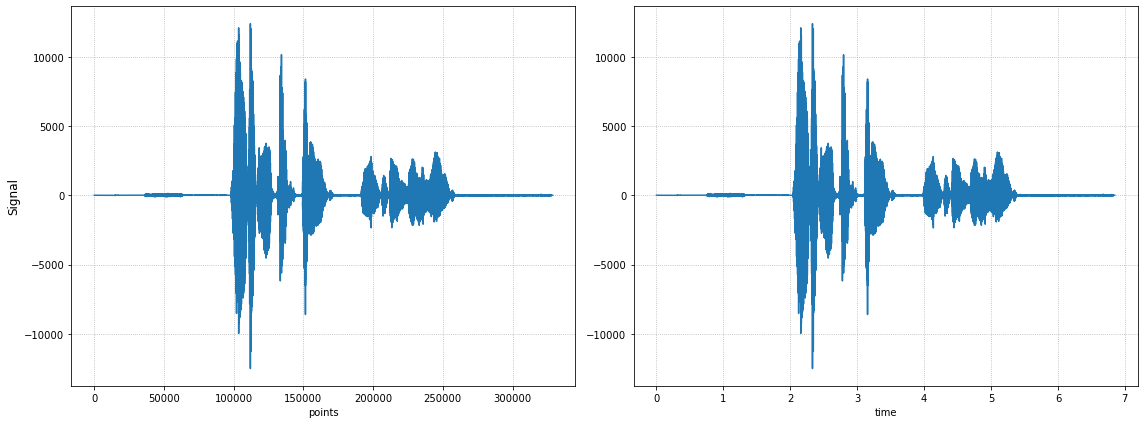

In [14]:
plt.figure(figsize=(16,6))
plt.subplot(121)
# plt.title('Time Domain', fontsize=16)
plt.ylabel('Signal', fontsize=12)
plt.tick_params(labelsize=10)
plt.xlabel('points')
plt.grid(linestyle=':')
plt.plot(x, single_channel)

plt.subplot(122)
plt.xlabel('time')
plt.grid(linestyle=':')
plt.plot(times, single_channel)
plt.tight_layout()

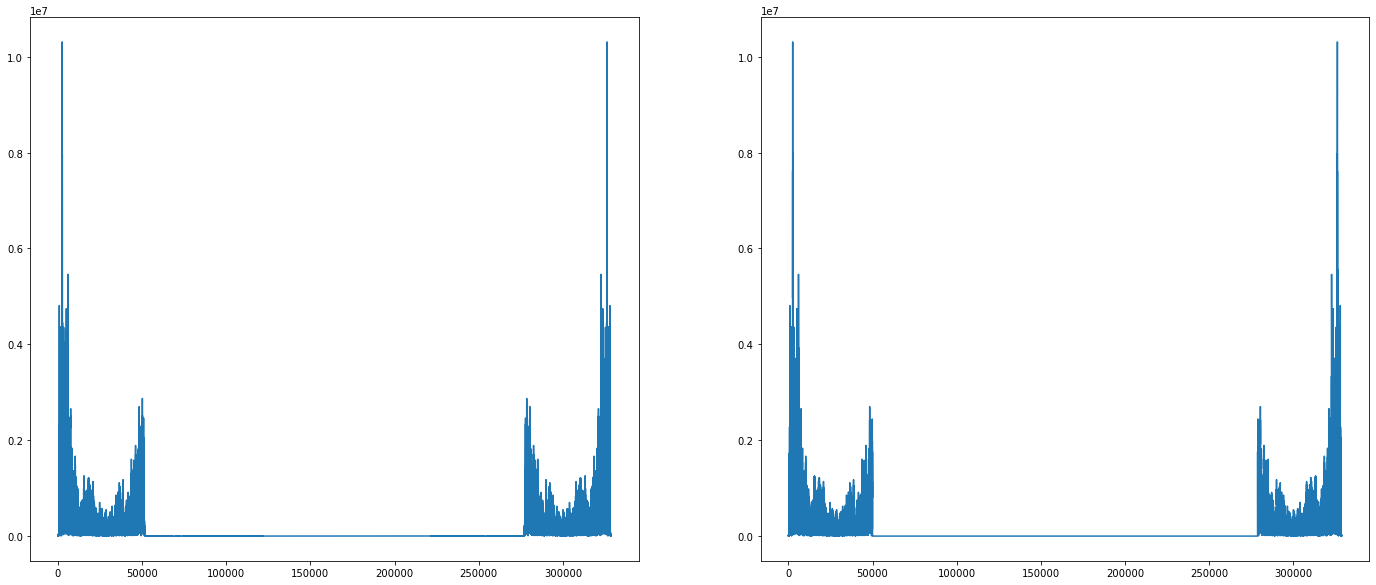

In [15]:
plt.figure(figsize=(24,10))
plt.subplot(121)
f = np.fft.fft(single_channel)
fshift = np.abs(f)
plt.plot(x, fshift)

plt.subplot(122)
fft_shift_copy = f.copy()
points = 50000
fft_shift_copy[points:length-points] = 0
fft_shift_copy_plot = abs(fft_shift_copy)
plt.plot(x, fft_shift_copy_plot)

Y:\Anaconda\anaconda\envs\study\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


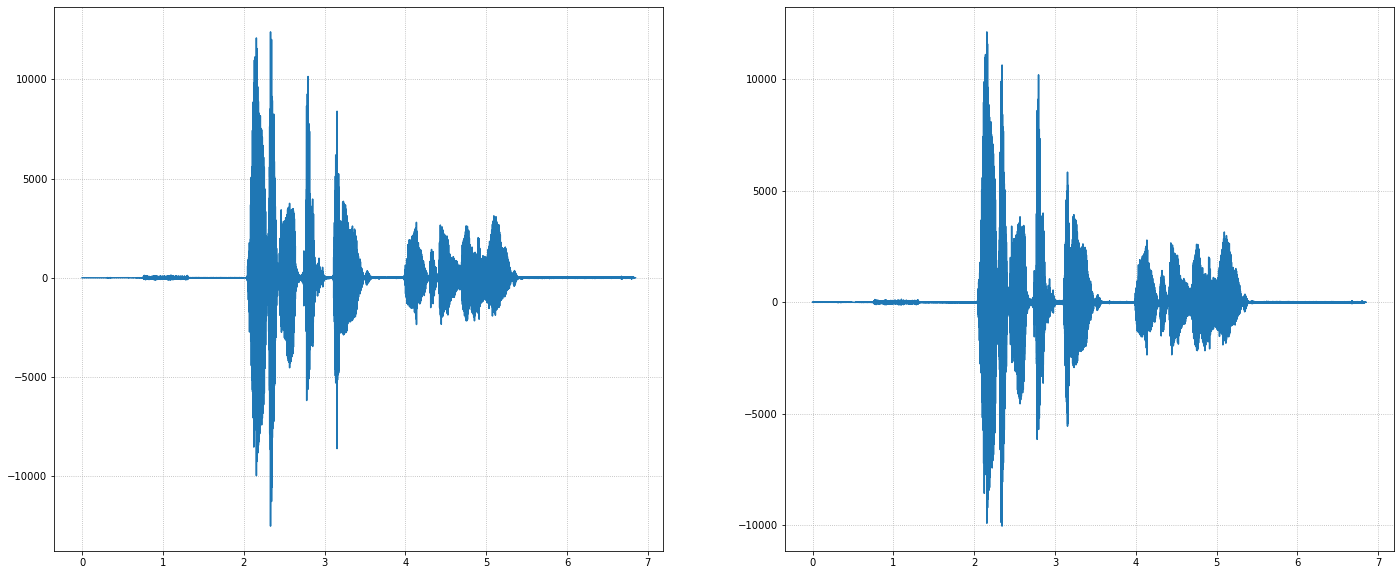

In [41]:
plt.figure(figsize=(24,10))

plt.subplot(121)
plt.grid(linestyle=':')
plt.plot(times, single_channel)

plt.subplot(122)
wav_ifft = np.fft.ifft(fft_shift_copy)
plt.grid(linestyle=':')
plt.plot(times, wav_ifft)

In [43]:
# wf.write('./results/filter.wav', sample_rate, wav_ifft)

### 稀疏性

In [52]:
k = float(points*2 / length)
k

0.30422507788161995

## wavelet

In [17]:
import pywt

In [25]:
w = pywt.Wavelet('db2')
print(db)
maxlev = pywt.dwt_max_level(length, w.dec_len)
print("maximum level is: "+str(maxlev))

Wavelet db2
  Family name:    Daubechies
  Short name:     db
  Filters length: 4
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False
maximum level is: 16


In [19]:
threshold=0.04  #Threshold for filtering

#Decompose into wavelet components,to the level selected:
coffs=pywt.wavedec(single_channel,'db2',level=maxlev) #将信号进行小波分解

for i in range(1,len(coffs)):
    coffs[i]=pywt.threshold(coffs[i],threshold*max(coffs[i]))

datarec=pywt.waverec(coffs,'db2')#将信号进行小波重构

0 328704


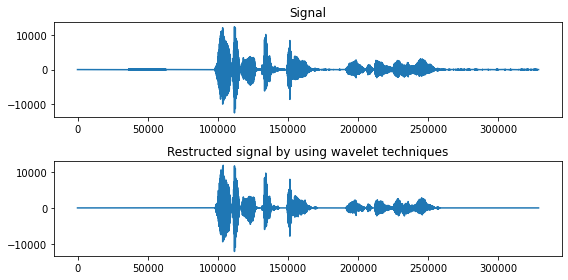

In [39]:
plt.figure(figsize=(8, 4))
plt.subplot(211)
plt.plot(x, single_channel)
plt.title("Signal")
plt.subplot(212)
plt.plot(x, datarec)
plt.title("Restructed signal by using wavelet techniques")
plt.tight_layout()
plt.show()

### 进行分频处理

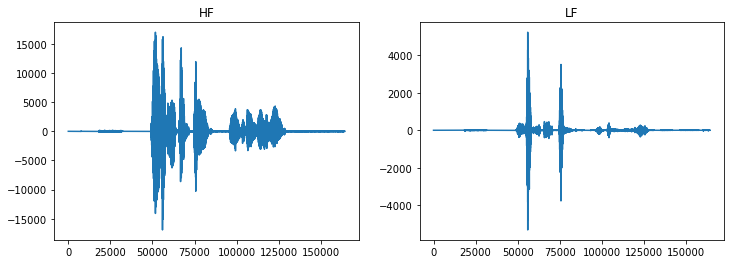

In [33]:
ca, cd = pywt.dwt(single_channel,'db2')
# ca
x_len = np.arange(len(ca))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('HF')
plt.plot(x_len, ca)

plt.subplot(122)
plt.title('LF')
plt.plot(x_len, cd)

In [29]:
result = pywt.idwt(ca, cd, 'db2')
result == single_channel

array([ True,  True,  True, ...,  True,  True,  True])

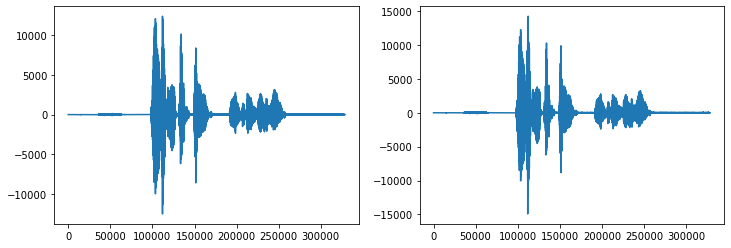

In [32]:
result_hf = pywt.idwt(ca, None, 'db2', 'sym')

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x, single_channel)

plt.subplot(122)
plt.plot(x, result_hf)

---

## 二. 处理图像

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(512, 512)


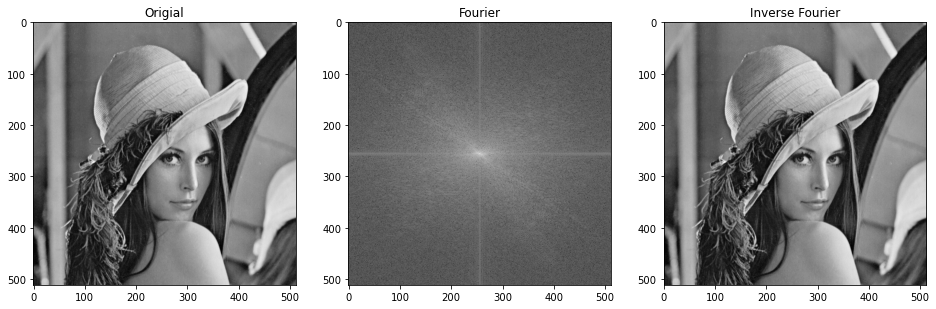

In [4]:
img = cv2.imread('./datas/Lena_gray.png',0) 
print(img.shape)
plt.figure(figsize=(16,8))import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.subplot(131)
plt.imshow(img,'gray')
plt.title('Origial')


# 傅里叶变换
plt.subplot(132)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
img_fft = np.log(np.abs(fshift))
plt.imshow(img_fft,'gray')
plt.title('Fourier')

# 傅里叶反变换
ishift = np.fft.ifftshift(fshift)
img_ifft = np.fft.ifft2(ishift)
img_ifft = abs(img_ifft)
plt.subplot(133)
plt.imshow(img_ifft, 'gray')
plt.title('Inverse Fourier')
plt.show()

In [19]:
img = cv2.imread("./datas/Lena_gray.png", 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
rows, cols

(512, 512)

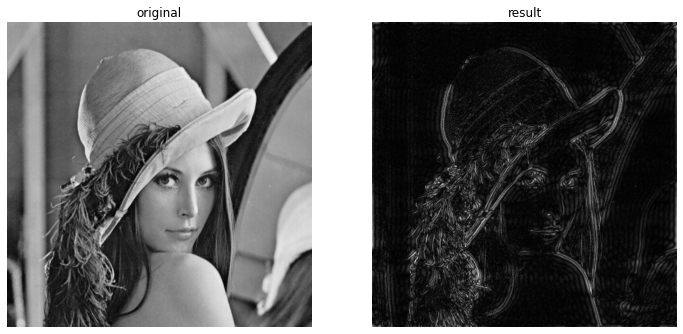

In [6]:
# 实现高通滤波
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

ishift = np.fft.ifftshift(fshift)
iimg = np.fft.ifft2(ishift)
iimg = np.abs(iimg)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('original')
plt.axis('off')

plt.subplot(122)
plt.imshow(iimg, cmap = 'gray')
plt.title('result')
plt.axis('off')

plt.show()

### 稀疏性

In [21]:
k = (512-60)**2 / 512**2 
k

0.77935791015625

## 二值化函数

In [7]:
def preprocess(img, filename):
    height, width = img.shape
    for i in range(height):
        for j in range(width):
            if img[i,j] > 180:
                img[i,j] = 255
            else:
                img[i,j] = 0
    cv2.imwrite(filename, img)

In [11]:
# bigcircle = cv2.imread('./datas/bigcircle.png', 0)
# preprocess(bigcircle, './results/big_circle.png')

# smallcircle = cv2.imread('./datas/small_circle.png', 0)
# preprocess(smallcircle, './results/small_circle.png')

## 1. 频域处理: 按照对称的形式进行分析

(159, 159)

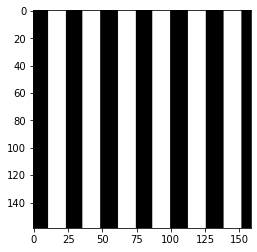

In [8]:
strip_img = cv2.imread('./results/strip_img.png', 0)[:159, :159]
plt.imshow(strip_img, cmap='gray')
strip_img.shape

In [9]:
rows,cols = strip_img.shape
crow,ccol = int((rows+1)//2), int((cols+1)//2)
crow,ccol

(80, 80)

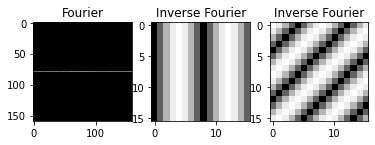

In [28]:
# 傅里叶变换
plt.subplot(131)
f = np.fft.fft2(strip_img)
fshift = np.fft.fftshift(f)
img_fft = np.log(np.abs(fshift)+1)
plt.imshow(img_fft,'gray')
plt.title('Fourier')

# 与 Y 轴对称
plt.subplot(132)
# fshift[...] = 0
# fshift[crow, ccol-1], fshift[crow, ccol+1] = complex(0,1), complex(0,-1)

fshift_zero = np.zeros((16,16))
# fshift_zero[7,7], fshift_zero[7,9] = complex(0,1), complex(0,-1)
fshift_zero[7,7], fshift_zero[7,9] = 1, -1
ishift = np.fft.ifftshift(fshift_zero)
img_ifft = np.fft.ifft2(ishift)
img_ifft = abs(img_ifft)
plt.imshow(img_ifft, 'gray')
plt.title('Inverse Fourier')

# 与原点对称
plt.subplot(133)
# fshift[...] = 0
fshift_zero = np.zeros((16,16))
fshift_zero[7,7], fshift_zero[9,9] = 1, 1
ishift = np.fft.ifftshift(fshift_zero)
img_ifft = np.fft.ifft2(ishift)
img_ifft = abs(img_ifft)
plt.imshow(img_ifft, 'gray')
plt.title('Inverse Fourier')
plt.show()

## 2. 频域处理: 对圆进行分析

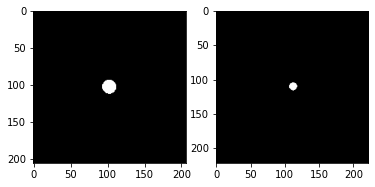

In [16]:
bigcircle = cv2.imread('./results/big_circle.png', 0)
smallcircle = cv2.imread('./results/small_circle.png', 0)

plt.subplot(121)
plt.imshow(bigcircle, cmap='gray')

plt.subplot(122)
plt.imshow(smallcircle, cmap='gray')

Text(0.5, 1.0, 'Fourier for small_circle')

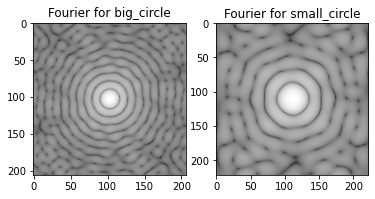

In [17]:
plt.subplot(121)
f = np.fft.fft2(bigcircle)
fshift = np.fft.fftshift(f)
img_fft = np.log(np.abs(fshift)+1)
plt.imshow(img_fft, cmap='gray')
plt.title('Fourier for big_circle')

plt.subplot(122)
f = np.fft.fft2(smallcircle)
fshift = np.fft.fftshift(f)
img_fft = np.log(np.abs(fshift)+1)
plt.imshow(img_fft, cmap='gray')
plt.title('Fourier for small_circle')

## 3. 创建一条黑色中的白条及其傅里叶变换

### 3.1 非边界

Text(0.5, 1.0, 'Fourier for stripe')

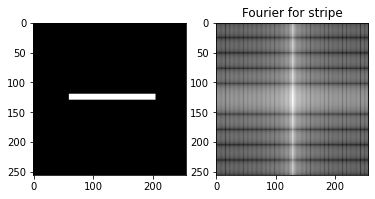

In [33]:
white_stripe = np.zeros((256, 256))
white_stripe[120:130, 60:205] = 255
plt.subplot(121)
plt.imshow(white_stripe, cmap='gray')

plt.subplot(122)
f = np.fft.fft2(white_stripe)
fshift = np.fft.fftshift(f)
img_fft = np.log(np.abs(fshift)+1)
plt.imshow(img_fft,'gray')
plt.title('Fourier for stripe')

### 3.2 边界

Text(0.5, 1.0, 'Fourier for stripe')

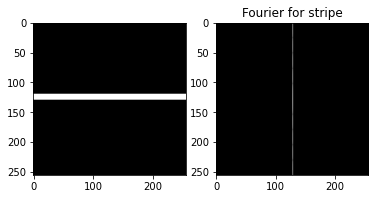

In [34]:
white_stripe = np.zeros((256, 256))
white_stripe[120:130, :] = 255
plt.subplot(121)
plt.imshow(white_stripe, cmap='gray')

plt.subplot(122)
f = np.fft.fft2(white_stripe)
fshift = np.fft.fftshift(f)
img_fft = np.log(np.abs(fshift)+1)
plt.imshow(img_fft,'gray')
plt.title('Fourier for stripe')

### 3.3 一条细线+平移

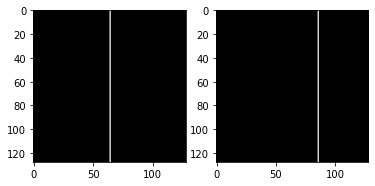

In [8]:
plt.subplot(121)
white_stripe1 = np.zeros((128, 128))
white_stripe1[:, 64] = 255
plt.imshow(white_stripe1, cmap='gray')

plt.subplot(122)
white_stripe2 = np.zeros((128, 128))
white_stripe2[:, 85] = 255
plt.imshow(white_stripe2, cmap='gray')

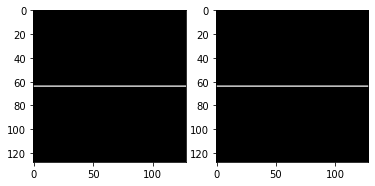

In [9]:
plt.subplot(121)
f = np.fft.fft2(white_stripe1)
fshift = np.fft.fftshift(f)
img_fft = np.log(np.abs(fshift)+1)
plt.imshow(img_fft,'gray')

plt.subplot(122)
f = np.fft.fft2(white_stripe2)
fshift = np.fft.fftshift(f)
img_fft = np.log(np.abs(fshift)+1)
plt.imshow(img_fft,'gray')

### 3.4 多条细线

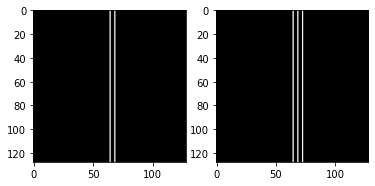

In [12]:
plt.subplot(121)
white_stripe3 = np.zeros((128, 128))
white_stripe3[:, 64], white_stripe3[:, 68] = 255, 255
plt.imshow(white_stripe3, cmap='gray')

plt.subplot(122)
white_stripe4 = np.zeros((128, 128))
white_stripe4[:, 64], white_stripe4[:, 68], white_stripe4[:, 72] = 255, 255, 255
plt.imshow(white_stripe4, cmap='gray')

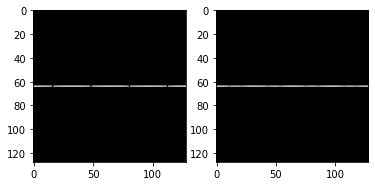

In [13]:
plt.subplot(121)
f = np.fft.fft2(white_stripe3)
fshift = np.fft.fftshift(f)
img_fft = np.log(np.abs(fshift)+1)
plt.imshow(img_fft,'gray')

plt.subplot(122)
f = np.fft.fft2(white_stripe4)
fshift = np.fft.fftshift(f)
img_fft = np.log(np.abs(fshift)+1)
plt.imshow(img_fft,'gray')